# Gradient Boosting Machine for Classification

## Reading the dataset

In [ ]:
# Importing the required library
import pandas as pd

In [ ]:
# Reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/diabetes.csv')

In [ ]:
# Checking top 5 rows of dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Checking the shape of the dataset
data.shape

(768, 9)

In [ ]:
# Class label count
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# percentage distribution
data['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Defining input output features

In [ ]:
# Defining input (X) and output (y) features
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [ ]:
# Creating training and test patterns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, shuffle=True, random_state = 0)

In [ ]:
# Checking shape of training and test sets
X_train.shape, X_test.shape

((691, 8), (77, 8))

In [ ]:
# input patterns
X_train

array([[6.00e+00, 1.54e+02, 7.40e+01, ..., 2.93e+01, 8.39e-01, 3.90e+01],
       [4.00e+00, 8.30e+01, 8.60e+01, ..., 2.93e+01, 3.17e-01, 3.40e+01],
       [1.00e+00, 9.70e+01, 7.00e+01, ..., 3.81e+01, 2.18e-01, 3.00e+01],
       ...,
       [4.00e+00, 9.40e+01, 6.50e+01, ..., 2.47e+01, 1.48e-01, 2.10e+01],
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.01e+01, 3.00e-01, 3.50e+01],
       [5.00e+00, 1.36e+02, 8.20e+01, ..., 0.00e+00, 6.40e-01, 6.90e+01]])

## Initializing and training Gradient Boosting Classifier

In [ ]:
# Defining the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()

In [ ]:
# get values for lr, loss
from sklearn.model_selection import GridSearchCV
# prams to be searched
param_grid  = {'learning_rate':[0.01,0.1,1],'loss':['deviance','exponential']}
grid = GridSearchCV(classifier, param_grid,scoring='accuracy', return_train_score=False)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'learning_rate': 0.1, 'loss': 'exponential'}


In [ ]:
# Training the GBM classifier
classifier = GradientBoostingClassifier(learning_rate= 0.1, loss= 'exponential')
classifier.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential')

## Predecting and Evaluating the classifier

In [ ]:
# Making predictions with the test data
y_pred = classifier.predict(X_test)

In [ ]:
# Combining the actual and predicted values
pd.DataFrame(data={'Actual Outcomes': y_test, 'Predicted Outcomes': y_pred}).head()

,Actual Outcomes,Predicted Outcomes
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


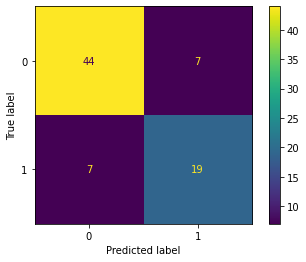

In [ ]:
# Confusuion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)

In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8181818181818182

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        51
           1       0.73      0.73      0.73        26

    accuracy                           0.82        77
   macro avg       0.80      0.80      0.80        77
weighted avg       0.82      0.82      0.82        77



# Gradient Boosting Machine for Regression

## Reading the dataset

In [ ]:
# import pandas
import pandas as pd

In [ ]:
# load the data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/insurance.csv')

In [ ]:
# Visulize the top 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Preprocess and define input-output features

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
# extract categorical columns
cat_columns = data.select_dtypes('object').columns
# encode the columns
data[cat_columns] = data[cat_columns].apply(LabelEncoder().fit_transform)

In [ ]:
# Defining input (X) and output (y) features
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
# Creating training and test patterns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 0)

In [ ]:
# Checking shape of training and test sets
X_train.shape, X_test.shape

((1070, 6), (268, 6))

In [ ]:
# input patterns
X_train

array([[37.  ,  1.  , 34.1 ,  4.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 34.43,  0.  ,  0.  ,  2.  ],
       [23.  ,  0.  , 36.67,  2.  ,  1.  ,  0.  ],
       ...,
       [40.  ,  1.  , 25.08,  0.  ,  0.  ,  2.  ],
       [19.  ,  1.  , 35.53,  0.  ,  0.  ,  1.  ],
       [33.  ,  0.  , 18.5 ,  1.  ,  0.  ,  3.  ]])

## Initializing and training Gradient Boosting Regressor

In [ ]:
# Defining the Gaussian Naive Bayes
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()

In [ ]:
# Training the SVM classifier
regressor.fit(X_train, y_train)

GradientBoostingRegressor()

## Preditions and Evaluation of Regressor

In [ ]:
# Making predictions on the test data
y_pred = regressor.predict(X_test)

In [ ]:
# Comparing the predicted profits with actual profits
pd.DataFrame(data={ 'Actual Charges': y_test,'Predicted Charges': y_pred}).head()

,Actual Charges,Predicted Charges
0,9724.53000,12141.827923
1,8547.69130,9538.762935
2,45702.02235,45616.085830
3,12950.07120,13958.936934
4,9644.25250,10330.394823


In [ ]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE)

Mean Squared Error is: 16210356.983664649


In [ ]:
# Root Mean Squared Error (RMSE)
import math
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error is:', RMSE)

Root Mean Squared Error is: 4026.2087605667753


In [ ]:
# R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-Squared is:', r2)

R-Squared is: 0.8981313339919598


In [ ]:
# Adjusted R-Squared
adj = 1-(
         (1-r2)*(X_train.shape[0]-1)/
          (X_train.shape[0]-X_train.shape[1]-1)
          )
print('Adjusted R-Squared is:', adj)

Adjusted R-Squared is: 0.8975563462252163
